In [1]:
from crea_visualizza_istanza import *
from controlli_ammissibilita import *
from greedy import *
from local_search import *
from greedy_rand import *
from grasp import *
from tabu_search import *
from iterated_local_search import *
from visualizza_grafici import *
from clark_wright import *



delta_small = 1.5
G_small, residui_dict_small = generate_instance(num_bambini=100, pos_min=20, pos_max=50, seed=10, delta= delta_small)
#plot_graph(G_small, 'grafo_dim_ridotte.png')


#Stampo i nodi e le relative posizioni
for node, data in G_small.nodes(data=True):
    print(f"Nodo: {node}, Posizione: {data['pos']}, Massima Distanza: {data['max_distance']}")

#print("\n")

#Stampo gli archi e i relativi pesi
#for u, v, data in G_small.edges(data=True):
#    print(f"Arco: {u} - {v}, Peso: {data['weight']}")

subsequentNN = []
schoolNN = []
ls_subsequentNN = []
ls_schoolNN = []
grasp_subsequentNN = []
grasp_schoolNN = []
Ils_subsequentNN = []
Ils_schoolNN = []
grasp_bI = []
tabu = []
ils_bI = []
times_small = []




Nodo: Bambino_1, Posizione: [43.1396193  20.62255848], Massima Distanza: 34.5
Nodo: Bambino_2, Posizione: [39.00944705 42.46411648], Massima Distanza: 9.0
Nodo: Bambino_3, Posizione: [34.95521037 26.74389937], Massima Distanza: 30.0
Nodo: Bambino_4, Posizione: [25.94188594 42.81592137], Massima Distanza: 28.5
Nodo: Bambino_5, Posizione: [25.0733251  22.65019443], Massima Distanza: 43.5
Nodo: Bambino_6, Posizione: [40.56079455 48.60180039], Massima Distanza: 10.5
Nodo: Bambino_7, Posizione: [20.11844799 35.3657679 ], Massima Distanza: 39.0
Nodo: Bambino_8, Posizione: [44.37862885 38.375782  ], Massima Distanza: 9.0
Nodo: Bambino_9, Posizione: [41.65265952 28.75628205], Massima Distanza: 24.0
Nodo: Bambino_10, Posizione: [47.53322368 41.4372735 ], Massima Distanza: 6.0
Nodo: Bambino_11, Posizione: [36.27633104 24.26510143], Massima Distanza: 31.5
Nodo: Bambino_12, Posizione: [31.2002228  40.22400845], Massima Distanza: 21.0
Nodo: Bambino_13, Posizione: [33.25499523 33.0204198 ], Massima 

In [2]:
(percorsi_sub_NN, sub_NN_obj_val, residui_dict_small_sub_NN), time = subsequent_nearest_neighbour(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {sub_NN_obj_val}")
check_solution(percorsi_sub_NN, G_small, delta_small)
subsequentNN.append(sub_NN_obj_val)
times_small.append(time)


Tempo impiegato: 00:00:0.009294
Funzione obiettivo: 1200450
Soluzione ammissibile.


In [3]:
(percorsi_sch_NN, sch_NN_obj_val, residui_dict_small_sch_NN), time = school_nearest_neighbour(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_sch_NN)
print(f"Funzione obiettivo: {sch_NN_obj_val}")
check_solution(percorsi_sch_NN, G_small, delta_small)
schoolNN.append(sch_NN_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.001852
Funzione obiettivo: 1500493
Soluzione ammissibile.


In [4]:
(percorsi_sub_NN_R, sub_NN_R_obj_val, residui_dict_small_sub_NN_R), time = subsequent_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
print(f"Funzione obiettivo: {sub_NN_R_obj_val}")
check_solution(percorsi_sub_NN_R, G_small, delta_small)
subsequentNN.append(sub_NN_R_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.009810
Funzione obiettivo: 1700575
Soluzione ammissibile.


In [5]:
(percorsi_sch_NN_R, sch_NN_R_obj_val, residui_dict_small_sch_NN_R), time = school_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
print(f"Funzione obiettivo: {sch_NN_R_obj_val}")
check_solution(percorsi_sch_NN_R, G_small, delta_small)
schoolNN.append(sch_NN_R_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.008761
Funzione obiettivo: 1600589
Soluzione ammissibile.


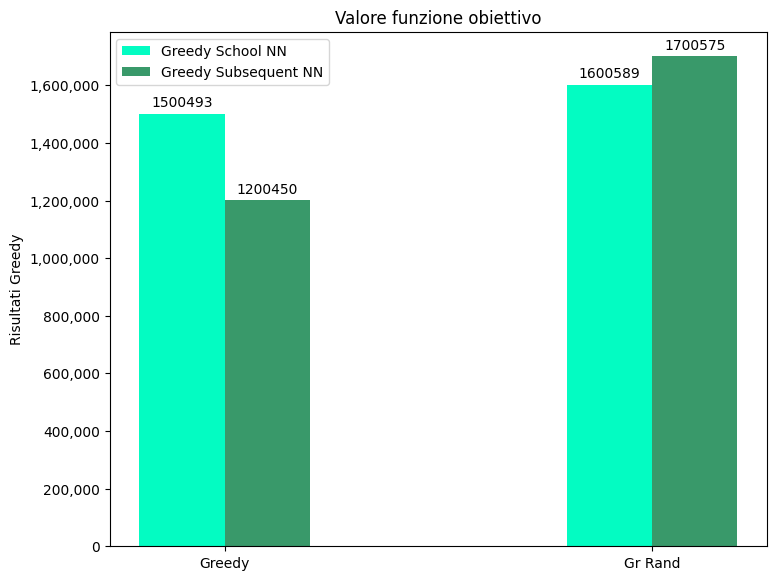

In [6]:
plotSubSchResults(subsequentNN, schoolNN, "Greedy", 'greedy_small.png')

In [7]:
#percorsi_cw, cw_obj_val, residui_dict_small_cw = clark_wright(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_cw)
#print(f"Funzione obiettivo: {cw_obj_val}")
#check_solution(percorsi_cw, G_small, delta_small)
#ls_subsequentNN.append(cw_obj_val)

#percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_sub_ls_bI = local_search_bI(G_small, residui_dict_small_cw, percorsi_cw, cw_obj_val, delta_small, max_len=5)
#stampa_percorsi(percorsi_ls_bI)
#print(f"Funzione obiettivo: {ls_bI_obj_val}")
#check_solution(percorsi_ls_bI, G_small, delta_small)
#ls_subsequentNN.append(ls_bI_obj_val)

In [8]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_sub_ls_bI), time = local_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_subsequentNN.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.016373
Funzione obiettivo: 1200450
Soluzione ammissibile.


In [9]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_ls_sch_bI), time = local_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_schoolNN.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.029411
Funzione obiettivo: 1500493
Soluzione ammissibile.


In [10]:
(percorsi_sub_ls_fI, sub_ls_fI_obj_val, residui_dict_small_sub_ls_fI), time = local_search_fI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {sub_ls_fI_obj_val}")
check_solution(percorsi_sub_ls_fI, G_small, delta_small)
ls_subsequentNN.append(sub_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.016718
Funzione obiettivo: 1200449
Soluzione ammissibile.


In [11]:
(percorsi_sch_ls_fI, sch_ls_fI_obj_val, residui_dict_small_sch_ls_fI), time = local_search_fI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {sch_ls_fI_obj_val}")
check_solution(percorsi_sch_ls_fI, G_small, delta_small)
ls_schoolNN.append(sch_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.046524
Funzione obiettivo: 1500487
Soluzione ammissibile.


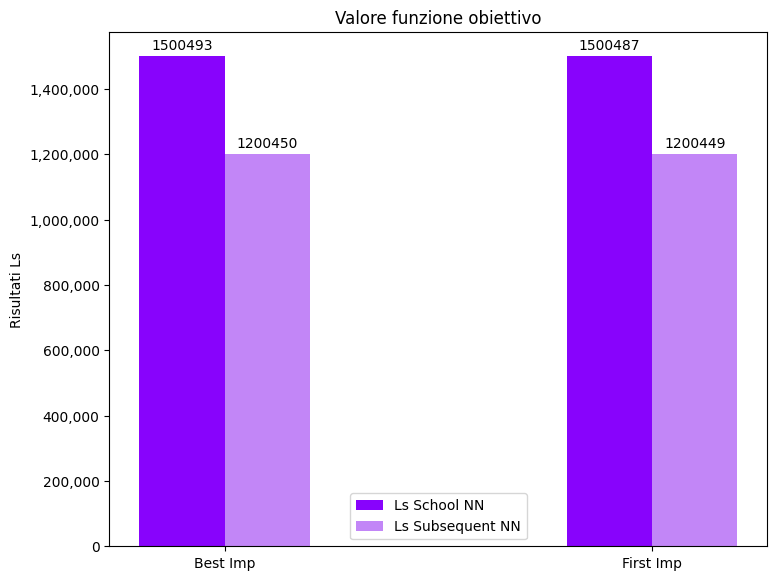

In [12]:
plotSubSchResults(ls_subsequentNN, ls_schoolNN, 'Ls', 'ls_small.png')

In [13]:
(percorsi_G_sub_NN_bI, G_sub_NN_bI_obj_val, residui_dict_small_G_sub_NN_bI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_bI", max_len=5)
print(f"Funzione obiettivo: {G_sub_NN_bI_obj_val}")
check_solution(percorsi_G_sub_NN_bI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_bI_obj_val)
grasp_bI.append(G_sub_NN_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.008853
Tempo impiegato: 00:00:0.045549
2
Tempo impiegato: 00:00:0.008676
Tempo impiegato: 00:00:0.034019
3
Tempo impiegato: 00:00:0.008498
Tempo impiegato: 00:00:0.064123
4
Tempo impiegato: 00:00:0.008957
Tempo impiegato: 00:00:0.051807
5
Tempo impiegato: 00:00:0.008596
Tempo impiegato: 00:00:0.100444
Tempo impiegato: 00:00:0.340497
Funzione obiettivo: 1200457
Soluzione ammissibile.


In [14]:
(percorsi_G_sch_bI, G_sch_bI_obj_val, residui_dict_small_G_sch_NN_bI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_bI", max_len=5)
print(f"Funzione obiettivo: {G_sch_bI_obj_val}")
check_solution(percorsi_G_sch_bI, G_small, delta_small)
grasp_schoolNN.append(G_sch_bI_obj_val)
grasp_bI.append(G_sch_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.002117
Tempo impiegato: 00:00:0.017621
2
Tempo impiegato: 00:00:0.001667
Tempo impiegato: 00:00:0.027847
3
Tempo impiegato: 00:00:0.001712
Tempo impiegato: 00:00:0.038027
4
Tempo impiegato: 00:00:0.001732
Tempo impiegato: 00:00:0.017073
5
Tempo impiegato: 00:00:0.001625
Tempo impiegato: 00:00:0.044219
Tempo impiegato: 00:00:0.154577
Funzione obiettivo: 1300494
Soluzione ammissibile.


In [15]:
(percorsi_G_sub_NN_fI, G_sub_NN_fI_obj_val, residui_dict_small_G_sub_NN_fI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_fI", max_len=5)
print(f"Funzione obiettivo: {G_sub_NN_fI_obj_val}")
check_solution(percorsi_G_sub_NN_fI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_fI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.008437
Tempo impiegato: 00:00:0.090713
2
Tempo impiegato: 00:00:0.009322
Tempo impiegato: 00:00:0.072911
3
Tempo impiegato: 00:00:0.008854
Tempo impiegato: 00:00:0.071040
4
Tempo impiegato: 00:00:0.008621
Tempo impiegato: 00:00:0.071260
5
Tempo impiegato: 00:00:0.008714
Tempo impiegato: 00:00:0.115552
Tempo impiegato: 00:00:0.466741
Funzione obiettivo: 1200451
Soluzione ammissibile.


In [16]:
(percorsi_G_sch_fI, G_sch_fI_obj_val, residui_dict_small_G_sch_NN_fI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_fI", max_len=5)
print(f"Funzione obiettivo: {G_sch_fI_obj_val}")
check_solution(percorsi_G_sch_fI, G_small, delta_small)
grasp_schoolNN.append(G_sch_fI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.002315
Tempo impiegato: 00:00:0.060273
2
Tempo impiegato: 00:00:0.001699
Tempo impiegato: 00:00:0.020665
3
Tempo impiegato: 00:00:0.001670
Tempo impiegato: 00:00:0.023893
4
Tempo impiegato: 00:00:0.001769
Tempo impiegato: 00:00:0.036612
5
Tempo impiegato: 00:00:0.001894
Tempo impiegato: 00:00:0.033466
Tempo impiegato: 00:00:0.185492
Funzione obiettivo: 1400499
Soluzione ammissibile.


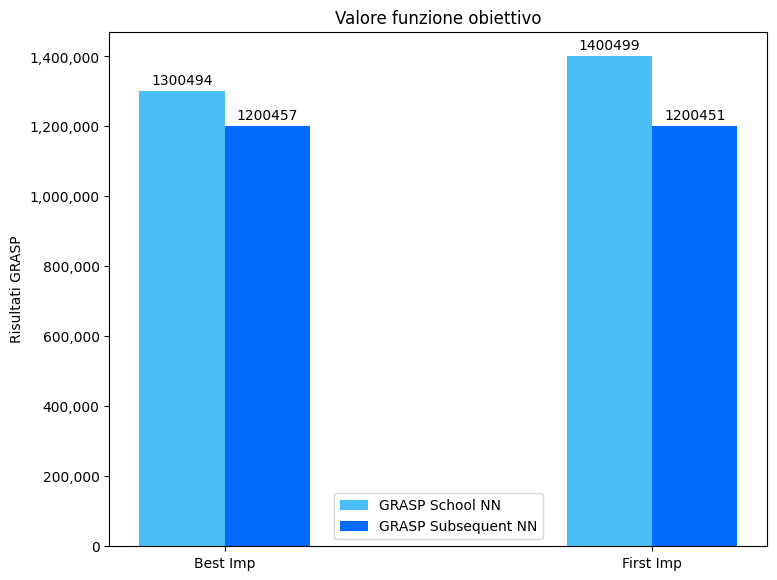

In [17]:

plotSubSchResults(grasp_subsequentNN, grasp_schoolNN, 'GRASP', 'grasp_small.png')


In [18]:
(percorsi_tabu_sub, tabu_sub_obj_val, residui_dict_small_tabu_sub), time = tabu_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sub_obj_val}")
check_solution(percorsi_tabu_sub, G_small, delta_small)
tabu.append(tabu_sub_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 1200450, Best OV: 1200450
Iterazione: 1, Non migliorato: 0, Current OV: 1200449, Best OV: 1200449
Iterazione: 2, Non migliorato: 1, Current OV: 1200449, Best OV: 1200449
Iterazione: 3, Non migliorato: 2, Current OV: 1200449, Best OV: 1200449
Iterazione: 4, Non migliorato: 3, Current OV: 1200449, Best OV: 1200449
Iterazione: 5, Non migliorato: 4, Current OV: 1200449, Best OV: 1200449
Iterazione: 6, Non migliorato: 5, Current OV: 1200449, Best OV: 1200449
Iterazione: 7, Non migliorato: 6, Current OV: 1200449, Best OV: 1200449
Iterazione: 8, Non migliorato: 7, Current OV: 1200449, Best OV: 1200449
Iterazione: 9, Non migliorato: 8, Current OV: 1200449, Best OV: 1200449
Iterazione: 10, Non migliorato: 9, Current OV: 1200449, Best OV: 1200449
Iterazione: 11, Non migliorato: 10, Current OV: 1200449, Best OV: 1200449
Iterazione: 12, Non migliorato: 0, Current OV: 1200442, Best OV: 1200442
Iterazione: 13, Non migliorato: 1, Current OV: 1200442, Best

In [19]:
(percorsi_tabu_sch, tabu_sch_obj_val, residui_dict_small_tabu_sch), time = tabu_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sch_obj_val}")
check_solution(percorsi_tabu_sch, G_small, delta_small)
tabu.append(tabu_sch_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 1500493, Best OV: 1500493
Iterazione: 1, Non migliorato: 0, Current OV: 1500491, Best OV: 1500491
Iterazione: 2, Non migliorato: 0, Current OV: 1500489, Best OV: 1500489
Iterazione: 3, Non migliorato: 0, Current OV: 1500488, Best OV: 1500488
Iterazione: 4, Non migliorato: 0, Current OV: 1500487, Best OV: 1500487
Iterazione: 5, Non migliorato: 1, Current OV: 1500487, Best OV: 1500487
Iterazione: 6, Non migliorato: 2, Current OV: 1500487, Best OV: 1500487
Iterazione: 7, Non migliorato: 3, Current OV: 1500487, Best OV: 1500487
Iterazione: 8, Non migliorato: 4, Current OV: 1500487, Best OV: 1500487
Iterazione: 9, Non migliorato: 5, Current OV: 1500487, Best OV: 1500487
Iterazione: 10, Non migliorato: 6, Current OV: 1500487, Best OV: 1500487
Iterazione: 11, Non migliorato: 7, Current OV: 1500487, Best OV: 1500487
Iterazione: 12, Non migliorato: 8, Current OV: 1500493, Best OV: 1500487
Iterazione: 13, Non migliorato: 9, Current OV: 1500493, Best 

In [20]:
(percorsi_ILS_sub_bI, ILS_sub_bI_obj_val, residui_dict_small_ILS_sub_bI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_bI")
print(f"Funzione obiettivo: {ILS_sub_bI_obj_val}")
check_solution(percorsi_ILS_sub_bI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_bI_obj_val)
ils_bI.append(ILS_sub_bI_obj_val)
times_small.append(time)

Temperatura:  160
Iterazione: 0, Current OV: 1200450, Best OV: 1200450
Tempo impiegato: 00:00:0.016646
Iterazione: 0, peturbed OV: 1200450, Best OV: 1200450
0.1693240411809317 1.0
Iterazione: 0, Current OV: 1200450, Best OV: 1200450
Tempo impiegato: 00:00:0.015402
Iterazione: 0, peturbed OV: 1200446, Best OV: 1200450
Iterazione: 0, Current OV: 1200446, Best OV: 1200446
Tempo impiegato: 00:00:0.021457
Iterazione: 0, peturbed OV: 1200445, Best OV: 1200446
Iterazione: 0, Current OV: 1200445, Best OV: 1200445
Tempo impiegato: 00:00:0.016732
Iterazione: 0, peturbed OV: 1200444, Best OV: 1200445
Iterazione: 0, Current OV: 1200444, Best OV: 1200444
Tempo impiegato: 00:00:0.016217
Iterazione: 0, peturbed OV: 1200448, Best OV: 1200444
0.438587874322359 0.9753099120283326
Temperatura:  144.0
Iterazione: 1, Current OV: 1200448, Best OV: 1200444
Tempo impiegato: 00:00:0.016173
Iterazione: 1, peturbed OV: 1200444, Best OV: 1200444
Iterazione: 1, Current OV: 1200444, Best OV: 1200444
Tempo impiegato

In [21]:
(percorsi_ILS_sub_fI, ILS_sub_fI_obj_val, residui_dict_small_ILS_sub_fI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_fI")
print(f"Funzione obiettivo: {ILS_sub_fI_obj_val}")
check_solution(percorsi_ILS_sub_fI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_fI_obj_val)
times_small.append(time)

Temperatura:  160
Iterazione: 0, Current OV: 1200450, Best OV: 1200450
Tempo impiegato: 00:00:0.017343
Iterazione: 0, peturbed OV: 1200447, Best OV: 1200450
Iterazione: 0, Current OV: 1200447, Best OV: 1200447
Tempo impiegato: 00:00:0.015306
Iterazione: 0, peturbed OV: 1200441, Best OV: 1200447
Iterazione: 0, Current OV: 1200441, Best OV: 1200441
Tempo impiegato: 00:00:0.010051
Iterazione: 0, peturbed OV: 1200443, Best OV: 1200441
0.46441873826645774 0.9875778004938814
Iterazione: 0, Current OV: 1200443, Best OV: 1200441
Tempo impiegato: 00:00:0.015147
Iterazione: 0, peturbed OV: 1200443, Best OV: 1200441
0.8146174096159637 1.0
Iterazione: 0, Current OV: 1200443, Best OV: 1200441
Tempo impiegato: 00:00:0.014901
Iterazione: 0, peturbed OV: 1200447, Best OV: 1200441
0.9545603279122992 0.9753099120283326
Temperatura:  144.0
Iterazione: 1, Current OV: 1200447, Best OV: 1200441
Tempo impiegato: 00:00:0.014949
Iterazione: 1, peturbed OV: 1200444, Best OV: 1200441
Iterazione: 1, Current OV: 1

In [22]:
(percorsi_ILS_sch_bI, ILS_sch_bI_obj_val, residui_dict_small_ILS_sch_bI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_bI")
print(f"Funzione obiettivo: {ILS_sch_bI_obj_val}")
check_solution(percorsi_ILS_sch_bI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_bI_obj_val)
ils_bI.append(ILS_sch_bI_obj_val)
times_small.append(time)

Temperatura:  160
Iterazione: 0, Current OV: 1500493, Best OV: 1500493
Tempo impiegato: 00:00:0.029541
Iterazione: 0, peturbed OV: 1500492, Best OV: 1500493
Iterazione: 0, Current OV: 1500492, Best OV: 1500492
Tempo impiegato: 00:00:0.022906
Iterazione: 0, peturbed OV: 1500484, Best OV: 1500492
Iterazione: 0, Current OV: 1500484, Best OV: 1500484
Tempo impiegato: 00:00:0.063248
Iterazione: 0, peturbed OV: 1300444, Best OV: 1500484
Iterazione: 0, Current OV: 1300444, Best OV: 1300444
Tempo impiegato: 00:00:0.018878
Iterazione: 0, peturbed OV: 1300419, Best OV: 1300444
Iterazione: 0, Current OV: 1300419, Best OV: 1300419
Tempo impiegato: 00:00:0.024723
Iterazione: 0, peturbed OV: 1300422, Best OV: 1300419
0.059760227772916896 0.9814246877477771
Temperatura:  144.0
Iterazione: 1, Current OV: 1300422, Best OV: 1300419
Tempo impiegato: 00:00:0.011658
Iterazione: 1, peturbed OV: 1300421, Best OV: 1300419
Iterazione: 1, Current OV: 1300421, Best OV: 1300419
Tempo impiegato: 00:00:0.010947
Ite

In [23]:
(percorsi_ILS_sch_fI, ILS_sch_fI_obj_val, residui_dict_small_ILS_sch_fI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_fI")
print(f"Funzione obiettivo: {ILS_sch_fI_obj_val}")
check_solution(percorsi_ILS_sch_fI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_fI_obj_val)
times_small.append(time)

Temperatura:  160
Iterazione: 0, Current OV: 1500493, Best OV: 1500493
Tempo impiegato: 00:00:0.048065
Iterazione: 0, peturbed OV: 1500494, Best OV: 1500493
0.7692308148658441 0.9937694906233947
Iterazione: 0, Current OV: 1500494, Best OV: 1500493
Tempo impiegato: 00:00:0.048403
Iterazione: 0, peturbed OV: 1400464, Best OV: 1500493
Iterazione: 0, Current OV: 1400464, Best OV: 1400464
Tempo impiegato: 00:00:0.011785
Iterazione: 0, peturbed OV: 1400466, Best OV: 1400464
0.4760349788111835 0.9875778004938814
Iterazione: 0, Current OV: 1400466, Best OV: 1400464
Tempo impiegato: 00:00:0.024510
Iterazione: 0, peturbed OV: 1400461, Best OV: 1400464
Iterazione: 0, Current OV: 1400461, Best OV: 1400461
Tempo impiegato: 00:00:0.077253
Iterazione: 0, peturbed OV: 1300437, Best OV: 1400461
Temperatura:  144.0
Iterazione: 1, Current OV: 1300437, Best OV: 1300437
Tempo impiegato: 00:00:0.021378
Iterazione: 1, peturbed OV: 1300439, Best OV: 1300437
0.27701765979647597 0.9862071167439163
Iterazione: 1

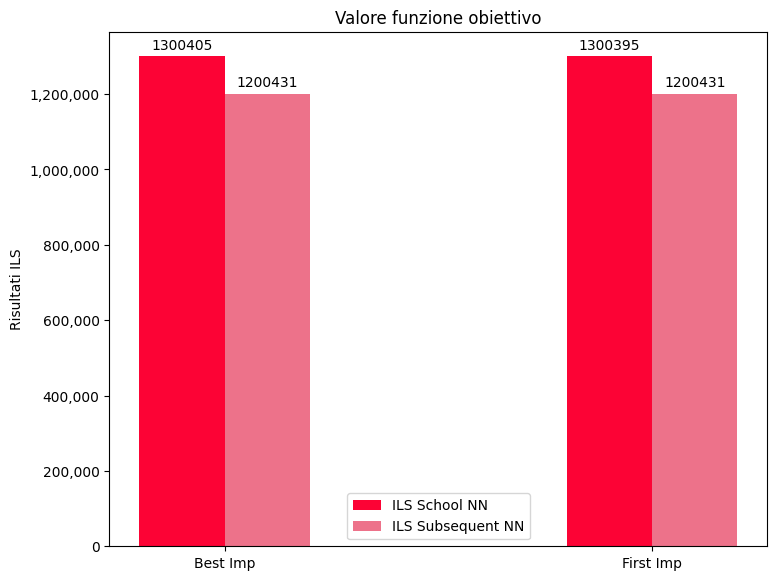

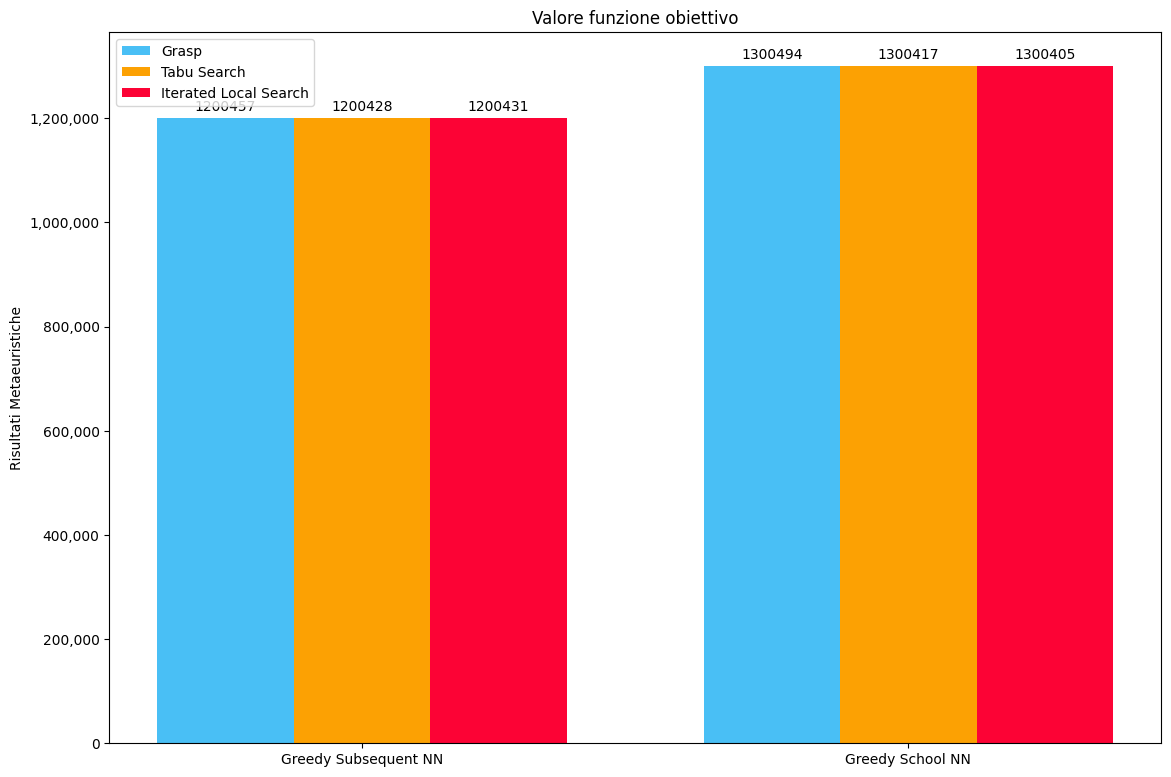

In [24]:
plotSubSchResults(Ils_subsequentNN, Ils_schoolNN, 'ILS', 'ils_small.png')

plotMetaheuristicsResults(grasp_bI, tabu, ils_bI, 'metaheuristics_small.png')

In [ ]:
results = []
results.append(subsequentNN[0])
results.append(schoolNN[0])
for i in ls_subsequentNN:
    results.append(i)
for i in ls_schoolNN:
    results.append(i)
for i in grasp_subsequentNN:   
    results.append(i)
for i in grasp_schoolNN:
    results.append(i)
results.append(tabu[0])
results.append(tabu[1])
for i in Ils_subsequentNN:
    results.append(i)
for i in Ils_schoolNN:
    results.append(i)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (16,) and arg 1 with shape (14,).

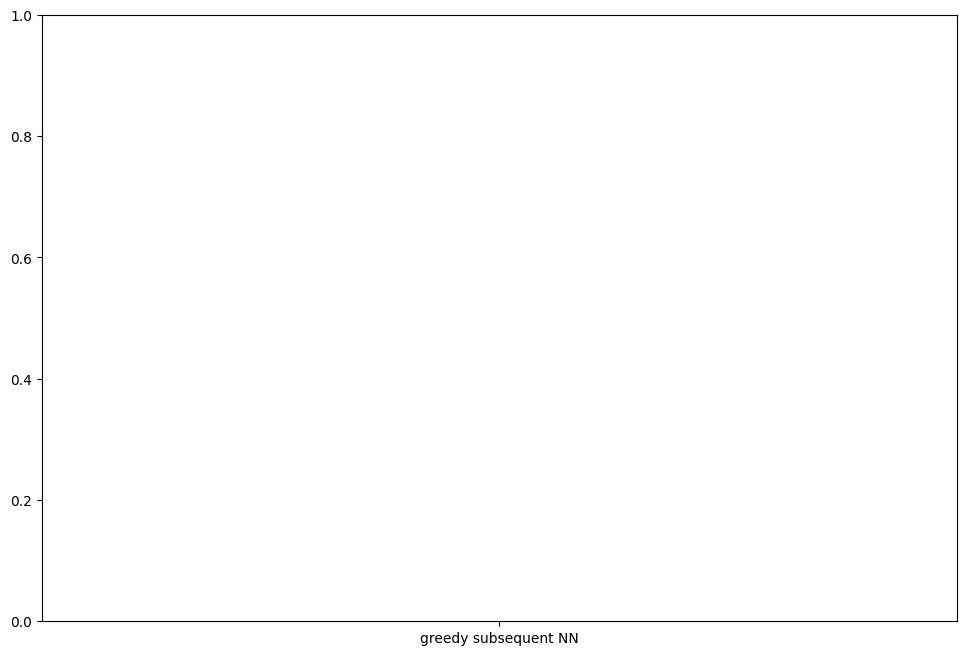

In [31]:
plot_all_results(results, 'all_small.png')